**Simple Exponential Smoothing (SES) Notes**

Noah Rubin

Self study - December 2021

---

[Exponential smoothing](https://en.wikipedia.org/wiki/Exponential_smoothing#:~:text=Exponential%20smoothing%20is%20a%20rule,exponentially%20decreasing%20weights%20over%20time.) is a smoothing technique that can be used to make predictions using a weighted average of all previous values in the time series. In the case of simple exponential smoothing, it is best used when there is no clear trend and no clear seasonality present. It is called exponential smoothing because while it attaches larger weights to the most recent observations, the weights decrease exponentially into the past. 

The weights are determined by a smoothing constant $\alpha$ in which $0 < \alpha \leq 1$ controls the speed at which the algorithm learns from the new data.

The level updating equation for SES to find $L_t$ is defined recursively as:

$$F_{t+1} = L_t = \alpha y_t + (1-\alpha)L_{t-1}$$

whereby the forecast one time period ahead is given as $F_{t+1}$ and $L_t$ ($t \geq 2$) is the estimated [level component](https://machinelearningmastery.com/decompose-time-series-data-trend-seasonality/) at the most recent time period  $t$. Sometimes $L_1$ is initialised as $y_1$, the first value in the series.

---

Since $L_{t-1}, L_{t-2}$ etc. all have their own formula, the equation can be written in expanded form as 

$$F_{t+1} = L_t = \alpha y_t + \alpha(1-\alpha)y_{t-1} + \alpha(1-\alpha)^2y_{t-2} + \alpha(1-\alpha)^3y_{t-3} + ... $$

and since $0 < \alpha \leq 1$, the weights decrease in exponential fashion. In cases where $\alpha$ gets very close to 0, past values will have equal influence on predictions, there will be less responsiveness to recent changes and resultantly, over smoothing occurs. As $\alpha \to 1$, the speed of the weights decaying will increase, and when $\alpha = 1$, only the first term remains and the forecast becomes $y_t$ 

---

The sum of the weights eventually approach 1, since it follows a geometric progression with ratio of $(1-\alpha)$. Using the sum of a GP for positive ratios less than 1:

$$\sum_{i=0}^{t-1} \alpha(1-\alpha)^i = \alpha * {\frac{(1 - (1-\alpha)^t)}{1 - (1 - \alpha)}} = 1 - (1-\alpha)^{t} = 1 \text{ as } t \to \infty$$

---

Some ways of setting $\alpha$ include:

* Testing different values of $\alpha$ (e.g. 0.1, 0.2)
* Minimise the loss function $ RSS = \sum_{t=1}^T (y_t - \hat{y}_t)^2$ (could result in overfitting)
* Base it off the formula $\alpha = \frac{2}{span + 1}$ in which span represents an [N-day exponentially weighted moving average](https://medium.com/@royanustup_10327/funwithstats-a-primer-for-ewma-a07214e847ed)

---

Lastly, from before, the level updating equation was given as 

$$F_{t+1} = L_t = \alpha y_t + (1-\alpha)L_{t-1}$$

After expanding and re-factorising

$$F_{t+1} = L_t = L_{t-1} + \alpha(y_t - L_{t-1})$$

Since $L_{t-1} = F_t$

$$F_{t+1} = L_t = F_t + \alpha(y_t - F_t)$$

Since $y_t - F_t$ is a residual, we obtain 

$$F_{t+1} = L_t = F_t + \alpha(e_t)$$

where $e_t$ is the residual representing the difference between the actual and estimated value.

---

This ultimately implies that computationally, SES is relatively non-expensive since we only require the most recent forecast and the residual associated with it (when doing the computations)

**Exponentially weighted moiving average for the Ishares Global High Yield Bond (AUD Hedged) [Exchange Traded Fund](https://www.investopedia.com/terms/e/etf.asp) (ETF): ⬇️**



In [1]:
import ses  # helper functions
import yfinance as yf
import pandas as pd
import numpy as np

# %matplotlib inline
%config InlineBackend.figure_format = 'svg'

# So that any changes to .py files get updated here too
%load_ext autoreload
%autoreload 2

**Load in the data**

In [2]:
df = yf.Ticker('IHHY.AX').history(period='max')

**Plot high prices**

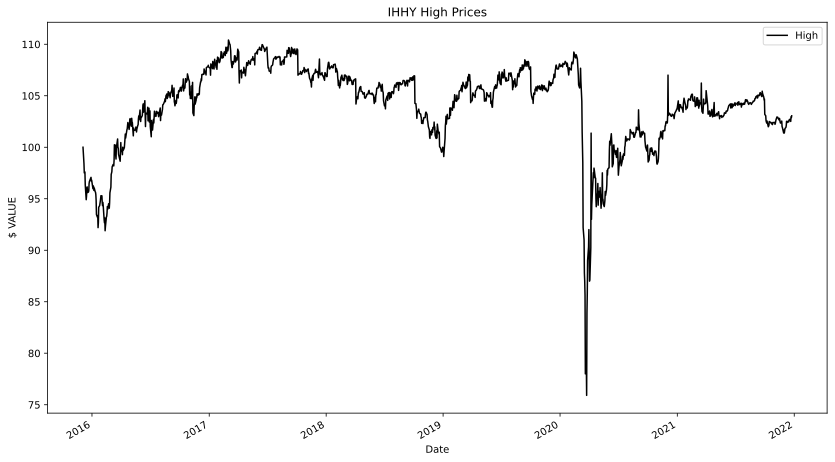

In [3]:
df[['High']].plot(figsize=(14, 8), color='black', title='IHHY High Prices', ylabel='$ VALUE');

**Calculate simple exponentially weighted moving average and plot the results**

In [4]:
ses.create_new_columns(df, np.arange(5, 30, 5))
# df.head(10)

If span = 5 then alpha = 0.3333333333333333
If span = 10 then alpha = 0.18181818181818182
If span = 15 then alpha = 0.125
If span = 20 then alpha = 0.09523809523809523
If span = 25 then alpha = 0.07692307692307693

All columns with the specified span values have now been created and added to your dataframe


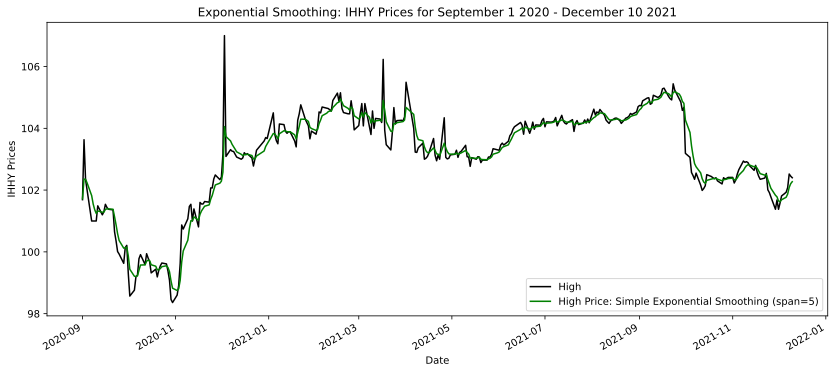

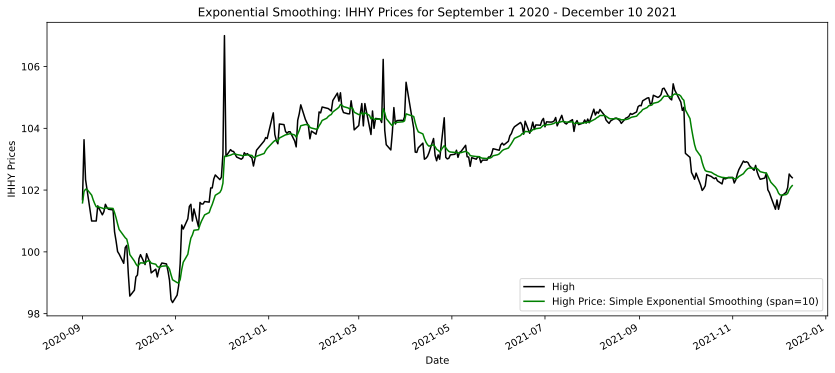

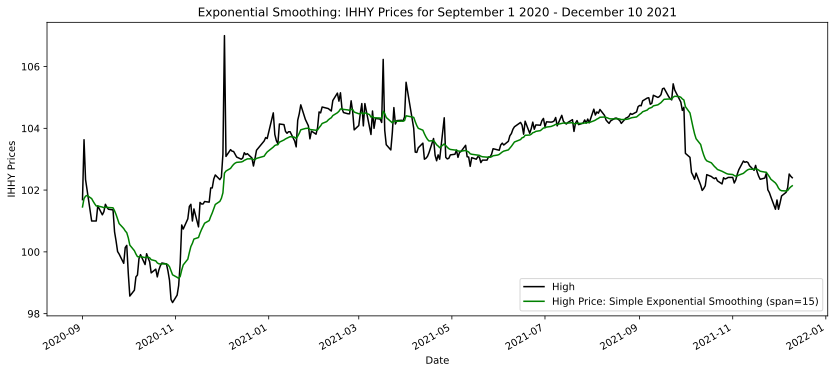

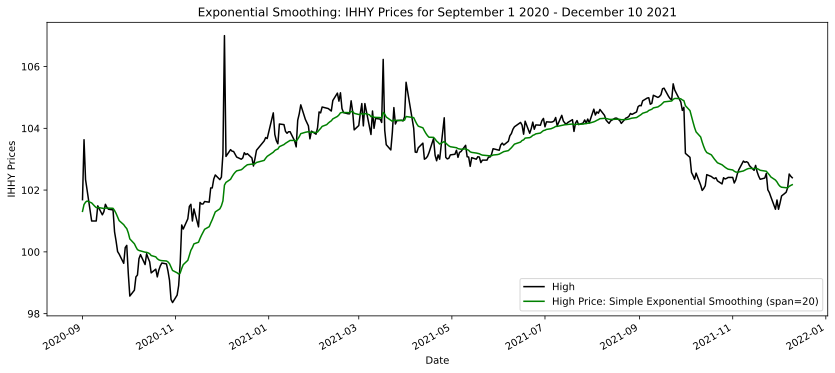

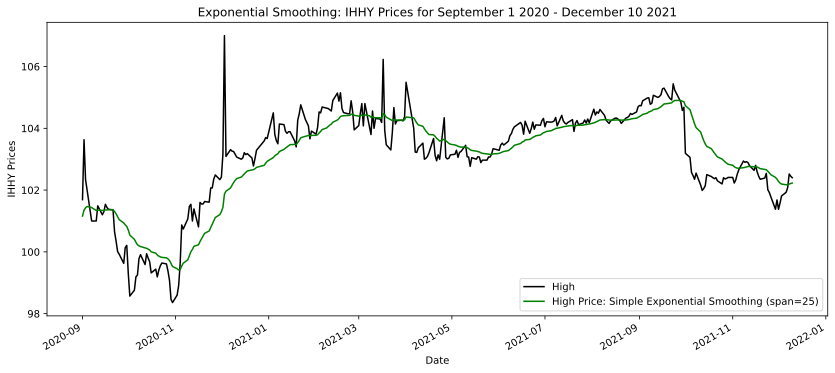

In [5]:
# Plot values from September 1 2020 to December 10 2021
for col in df.columns[-5:]:
    ses.plot_results(df, col, 'September 1 2020', 'December 10 2021')

Because SES assumes that there is no clear trend and no clear seasonal component, all forecasts into the future will be the $F_{T+1}$ forecast value, where $T$ is the final index. Hence the forecast into the future is a flat line with no slope